<div style="display: flex; justify-content: space-between; font-size: 1.5em; font-weight: bold;">
  <div>Aayush Bajaj</div>
  <div>z5362216</div>
  <div>25/06/2025</div>
</div>

# 0. EDA (Exploratory Data Analysis)

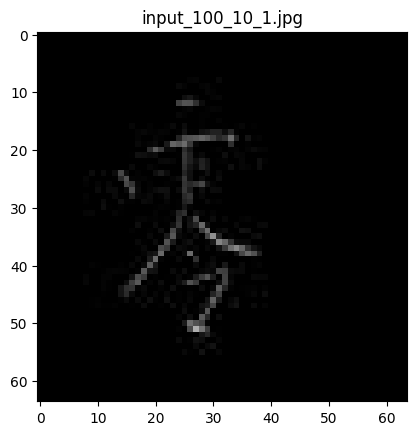

image dimensions: (64, 64, 3)


In [16]:
import cv2
import matplotlib.pyplot as plt

prefix = "./data/data/"
file = "input_100_10_1.jpg"
img = cv2.imread(prefix + file)
plt.imshow(img)
plt.title(file)
plt.show()
print(f"image dimensions: {img.shape}")

Length of Image List 1500


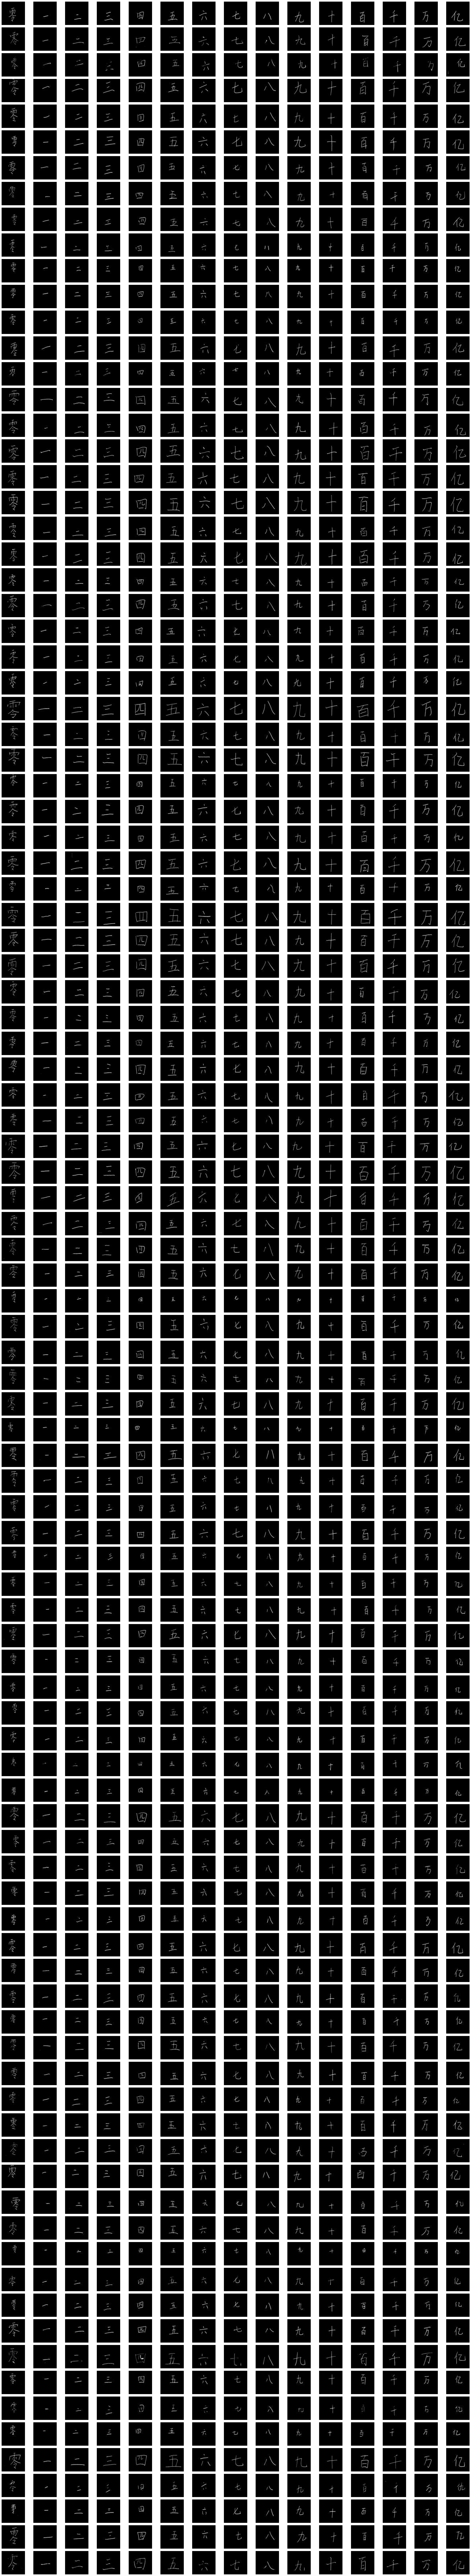

In [33]:
persons = list(range(1,101))
attempts = list(range(1,11))
characters = list(range(1,16))
for person in persons:
    for attempt in attempts:
        for character in characters:
            file = "input_" + str(person) + "_" + str(attempt) + "_" + str(character) + ".jpg"
#let
attempt = 1
# construct image list:
image_list = []
for person in persons:
    for character in characters:
        image_list.append("input_" + str(person) + "_" + str(attempt) + "_" + str(character) + ".jpg")

print(f"Length of Image List {len(image_list)}") # assert 1,500
# such that we construct a subplot of 
#
#        c h a r a c t e r
#  p
#  e
#  r
#  s
#  o
#  n
fig, axes = plt.subplots(100,15, figsize=(30,160))
axes = axes.ravel()

import os

for i, file in enumerate(image_list):
    img_path = os.path.join(prefix, file)
    img_sub = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"failed to print {file} at {img_path}")
        continue

    axes[i].imshow(img_sub, cmap='gray')
    #axes[i].set_title(file)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 1. Data-loading

## a. labels

In [75]:
# import labels from csv
import pandas as pd
labels = pd.read_csv("chinese_mnist.csv")

print(f"Max value in 'value' column: {labels['value'].max()}")
print(f"Max value in 'sample_id' column: {labels['sample_id'].max()}")
print(f"Max value in 'suite_id' column: {labels['suite_id'].max()}")
print(f"Max value in 'code' column: {labels['code'].max()}")
labels.head()

persons = list(range(1,101))
attempts = list(range(1,11))
characters = list(range(1,16))
image_list = []
for person in persons:
    for attempt in attempts:
        for character in characters:
            image_list.append("input_" + str(person) + "_" + str(attempt) + "_" + str(character) + ".jpg")
# zip labels with image_list
labels_list_to_zip = []
for person in persons:
    for attempt in attempts:
        for character in characters:
            label = labels[(labels['suite_id'] == person) & 
                     (labels['sample_id'] == attempt) & 
                     (labels['code'] == character)]['code']
            if not label.empty:
                labels_list_to_zip.append(label.item())

image_labels = list(zip(image_list, labels_list_to_zip))
len(labels_list_to_zip) # should be 15000

Max value in 'value' column: 100000000
Max value in 'sample_id' column: 10
Max value in 'suite_id' column: 100
Max value in 'code' column: 15


15000

# b. images as numpy arrays

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
# split into train and test set

labels.head()
image_dir = './data/data'

N = 6000 # number of images to use for training and testing
subset = image_labels[:N]

filenames = [fname for fname, label in subset]
labels = [label for fname, label in subset]

image_paths = [os.path.join(image_dir, fname) for fname in filenames]

# stratify split
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths,
    labels,
    train_size=N-1000,
    test_size=1000,
    stratify=labels,
    random_state=2006
)

def load_images(paths):
    return np.array([cv2.imread(path) for path in paths])

X_train = load_images(train_paths)
y_train = np.array(train_labels)

X_test = load_images(test_paths)
y_test = np.array(test_labels)


# 2. Machine Learning Models

## a. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train.reshape(len(X_train), -1), y_train)
# evaluate the model
accuracy = knn.score(X_test.reshape(len(X_test), -1), y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.35


In [79]:
# check that training data is correctly stratified
unique, counts = np.unique(y_train, return_counts=True)
print("Training data distribution:")
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")
# check that test data is correctly stratified
unique, counts = np.unique(y_test, return_counts=True)
print("Test data distribution:")
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")

Training data distribution:
Label 1: 333 samples
Label 2: 333 samples
Label 3: 333 samples
Label 4: 334 samples
Label 5: 333 samples
Label 6: 333 samples
Label 7: 333 samples
Label 8: 334 samples
Label 9: 333 samples
Label 10: 334 samples
Label 11: 333 samples
Label 12: 334 samples
Label 13: 333 samples
Label 14: 334 samples
Label 15: 333 samples
Test data distribution:
Label 1: 67 samples
Label 2: 67 samples
Label 3: 67 samples
Label 4: 66 samples
Label 5: 67 samples
Label 6: 67 samples
Label 7: 67 samples
Label 8: 66 samples
Label 9: 67 samples
Label 10: 66 samples
Label 11: 67 samples
Label 12: 66 samples
Label 13: 67 samples
Label 14: 66 samples
Label 15: 67 samples


In [106]:
###############################
# rerun this cell as necessary.
###############################
# increase training data size
N = 11000
subset = image_labels[:N]

filenames = [fname for fname, label in subset]
labels = [label for fname, label in subset]

image_paths = [os.path.join(image_dir, fname) for fname in filenames]

# stratify split
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths,
    labels,
    train_size=N-1000,
    test_size=1000,
    stratify=labels,
    random_state=2006
)

def load_images(paths):
    return np.array([cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in paths])

X_train = load_images(train_paths)
y_train = np.array(train_labels)

X_test = load_images(test_paths)
y_test = np.array(test_labels)

In [98]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3000, 64, 64), y_train shape: (3000,)
X_test shape: (1000, 64, 64), y_test shape: (1000,)


In [99]:
knn.fit(X_train.reshape(len(X_train), -1), y_train)
# evaluate the model
accuracy = knn.score(X_test.reshape(len(X_test), -1), y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.33


### Discussion
- considering the complexity of the data and the overtly simple KNN Decision surface that is being learned, we are clearly _underfitting_ the data and so our accuracy_score of 0.40 is generous if anything
- I would next increase the value for K and potentially redefine the distance metric to something more intelligent.

In [101]:
# boosting performance because I can
# automatically choose the best k
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 7, 11, 13]}
grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train.reshape(len(X_train), -1), y_train)
best_knn = grid_search.best_estimator_
# evaluate the model
accuracy = best_knn.score(X_test.reshape(len(X_test), -1), y_test)
print(f"Best KNN Accuracy: {accuracy:.2f}") 

Best KNN Accuracy: 0.33


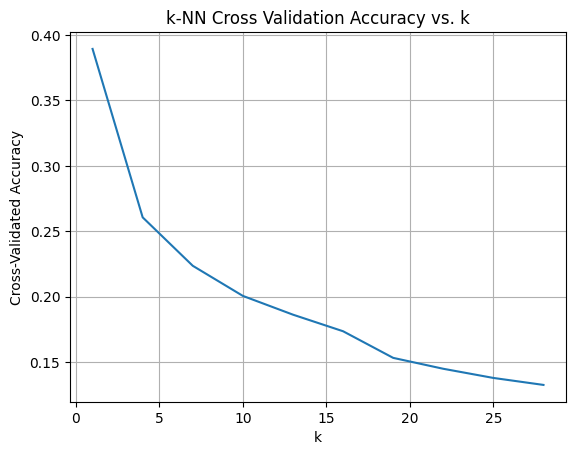

In [96]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

ks = list(range(1, 31, 3))
X_train_flat = X_train.reshape(len(X_train), -1)
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_flat, y_train, cv=5).mean() for k in ks]

plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Cross Validation Accuracy vs. k')
plt.grid(True)
plt.show()


these above results are a little traumatising. knn is clearly not a good fit for this dataset.

understanding why, 64x64=4096 dimensional space suffers from the **curse of dimensionality**. as such distances become less meaningful there (regardless of what metric I choose).

I would couple this with PCA if I were to actually try get some competitive performance in this vein.

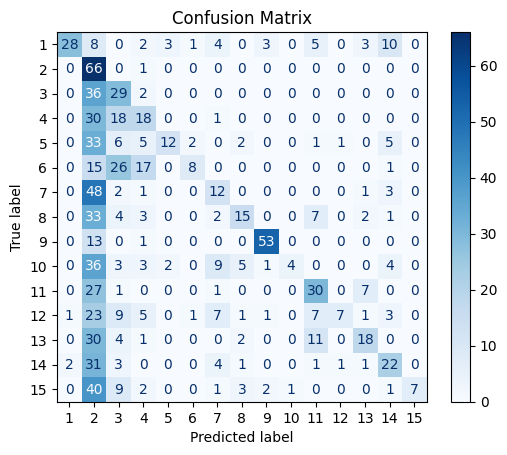

In [102]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_knn.predict(X_test.reshape(len(X_test), -1))
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [125]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)])
print(report)

              precision    recall  f1-score   support

           1       0.76      0.63      0.69        67
           2       0.80      0.67      0.73        67
           3       0.52      0.25      0.34        67
           4       0.60      0.43      0.50        67
           5       0.79      0.45      0.57        67
           6       0.52      0.48      0.50        67
           7       0.29      0.35      0.32        66
           8       0.31      0.50      0.38        66
           9       0.74      0.52      0.61        66
          10       0.26      0.37      0.30        67
          11       0.43      0.27      0.33        67
          12       0.46      0.18      0.26        67
          13       0.40      0.30      0.34        66
          14       0.22      0.64      0.32        67
          15       0.40      0.38      0.39        66

    accuracy                           0.43      1000
   macro avg       0.50      0.43      0.44      1000
weighted avg       0.50   

## b. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2006)
dt.fit(X_train.reshape(len(X_train), -1), y_train)
# evaluate the model
accuracy = dt.score(X_test.reshape(len(X_test), -1), y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.29


In [ ]:
# now with 10,000 training samples:

# fit
dt.fit(X_train.reshape(len(X_train), -1), y_train)

# evaluate 
accuracy = dt.score(X_test.reshape(len(X_test), -1), y_test)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.33


### Discussion

- once again this method is not intended for computer vision; it sucks.
- I'm just going to implement a pre-processing pipeline to see how much difference PCA can make here

In [111]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

pipe = Pipeline([
    ("scale", StandardScaler()), 
    ("pca", PCA(n_components=110)), 
    ("clf", DecisionTreeClassifier(random_state=2006)) # don't even need to limit the depth to prevent overfitting!
])

pipe.fit(X_train_flat, y_train)
accuracy = pipe.score(X_test_flat, y_test)
print(f"Decision Tree with PCA Accuracy: {accuracy:.2f}")


Decision Tree with PCA Accuracy: 0.52


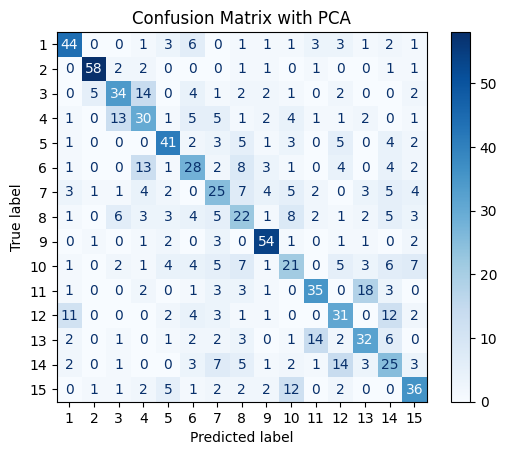

In [112]:
### ayeee, above 50% accuracy!!!
# anyways, need to make a confusion matrix now
cm = confusion_matrix(y_test, pipe.predict(X_test_flat), labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with PCA')
plt.show()

In [124]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, pipe.predict(X_test_flat), target_names=[str(i) for i in np.unique(y_test)])
print(report)

              precision    recall  f1-score   support

           1       1.00      0.03      0.06        67
           2       1.00      0.01      0.03        67
           3       0.00      0.00      0.00        67
           4       0.10      0.01      0.03        67
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00        67
           7       0.08      0.03      0.04        66
           8       0.00      0.00      0.00        66
           9       0.00      0.00      0.00        66
          10       0.07      0.81      0.12        67
          11       0.25      0.03      0.05        67
          12       0.20      0.01      0.03        67
          13       0.14      0.14      0.14        66
          14       0.04      0.01      0.02        67
          15       0.17      0.03      0.05        66

    accuracy                           0.07      1000
   macro avg       0.20      0.07      0.04      1000
weighted avg       0.20   

## c. Stochastic Gradient Descent Classifier

In [113]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=2006, max_iter=250, tol=1e-3)
sgd.fit(X_train_flat, y_train)
# evaluate the model
accuracy = sgd.score(X_test_flat, y_test)
print(f"SGD Classifier Accuracy: {accuracy:.2f}")

SGD Classifier Accuracy: 0.35


### Discussion
- poor performance due to it being a *linear model*
- linear models are not good at expressing the non-linear components of images.
- adam / rmsprop / adagrad could be attempted too.

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)
sgd = SGDClassifier(loss="hinge", alpha=1e-4, max_iter=1000, random_state=2006, tol=1e-3)
#                         0.412 with log_loss
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

sgd.fit(X_train_pca, y_train)
print("SGD Accuracy with PCA:", sgd.score(X_test_pca, y_test))

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')
warnings.filterwarnings("ignore", category=DeprecationWarning, module='sklearn')
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn')

SGD Accuracy with PCA: 0.428


In [122]:
# metrics time!
from sklearn.metrics import classification_report
y_pred = sgd.predict(X_test_pca)
report = classification_report(y_test, y_pred, target_names=[str(i) for i in range(1, 16)])
print(report)

              precision    recall  f1-score   support

           1       0.76      0.63      0.69        67
           2       0.80      0.67      0.73        67
           3       0.52      0.25      0.34        67
           4       0.60      0.43      0.50        67
           5       0.79      0.45      0.57        67
           6       0.52      0.48      0.50        67
           7       0.29      0.35      0.32        66
           8       0.31      0.50      0.38        66
           9       0.74      0.52      0.61        66
          10       0.26      0.37      0.30        67
          11       0.43      0.27      0.33        67
          12       0.46      0.18      0.26        67
          13       0.40      0.30      0.34        66
          14       0.22      0.64      0.32        67
          15       0.40      0.38      0.39        66

    accuracy                           0.43      1000
   macro avg       0.50      0.43      0.44      1000
weighted avg       0.50   

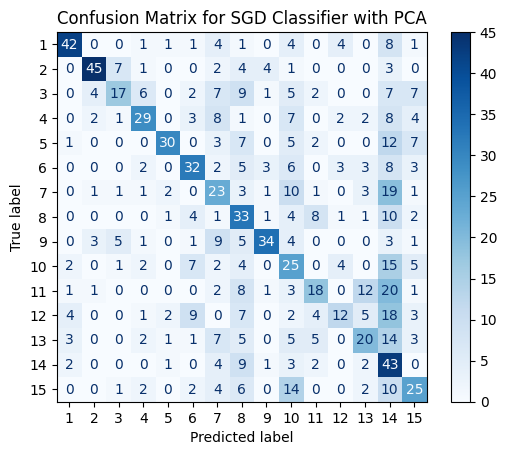

In [123]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SGD Classifier with PCA')
plt.show()